## Avacado Project

#### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

#### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
<ul>
<li>Date - The date of the observation</li>
<li>AveragePrice - the average price of a single avocado</li>
<li>type - conventional or organic</li>
<li>year - the year</li>
<li>Region - the city or region of the observation</li>
<li>Total Volume - Total number of avocados sold</li>
<li>4046 - Total number of avocados with PLU 4046 sold</li>
<li>4225 - Total number of avocados with PLU 4225 sold</li>
<li>4770 - Total number of avocados with PLU 4770 sold</li>
</ul>

#### Inspiration /Label 
Your task is to make a model that can consider the data provided and predict the Average Price.
To download the dataset, use the link given below. 

#### Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv

### Code starts from here......

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [23]:
avocado_data  = pd.read_csv(
    'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv',
    parse_dates=['Date'])
avocado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [222]:
# creating a copy for original dataframe
avocado_data_analysis = avocado_data.copy()
avocado_data_analysis.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [223]:
avocado_data_analysis.shape

(16468, 14)

So, the data has 16468 rows and 14 columns

In [224]:
avocado_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1517 non-null   float64       
 1   Date          1517 non-null   datetime64[ns]
 2   AveragePrice  1517 non-null   float64       
 3   Total Volume  1517 non-null   float64       
 4   4046          1517 non-null   float64       
 5   4225          1517 non-null   float64       
 6   4770          1517 non-null   float64       
 7   Total Bags    1517 non-null   float64       
 8   Small Bags    1517 non-null   float64       
 9   Large Bags    1517 non-null   float64       
 10  XLarge Bags   1517 non-null   float64       
 11  type          1517 non-null   object        
 12  year          1517 non-null   float64       
 13  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 1.8+ MB


#### Out of 16458 rows, only 1517 rows have non-zero values for all the features/columns
#### Column 'Unnamed: 0' is of no use so will drop the same
#### Also, column 'year' can also be derived from column 'Date'

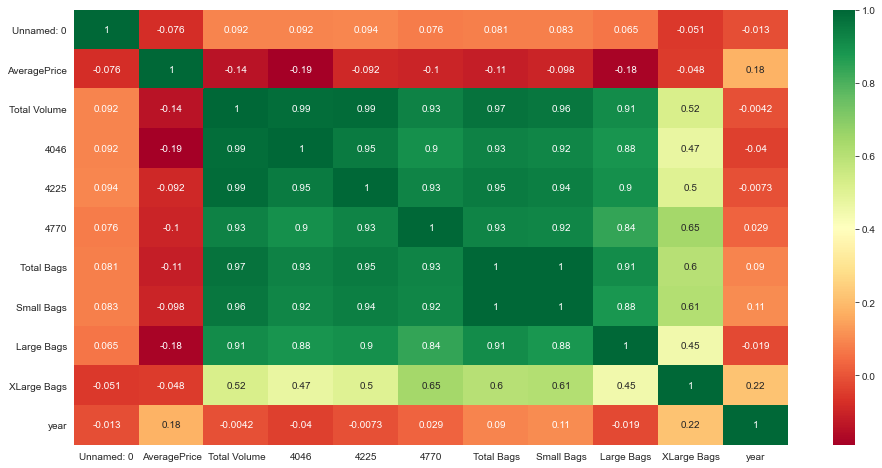

In [225]:
# checking the correlation of different columns with each other

plt.figure(figsize = (16,8))
sns.heatmap(avocado_data_analysis.corr(),annot=True,cmap ='RdYlGn')

### Inferences

<ul>
    <li>Output feature "AveragePrice" has very less correlation with all other features</li>
    <li>"Total Volume" sold is highly correlated with columns 4096,4225, 4770, Total Bags, Small bags, Large Bags but, we know that this feature is derived from the sum of 4096, 4225 and 4770. So, this is a derived feature is not required for further processing.</li>
    <li>"Total Bags" is highly correlated with columns Small bags and Large Bags. And "Total Bags" is sum of columns Small bags, XLarge Bags and Large Bags. So, this is a derived feature is not required for further processing.</li>
    </ul>

In [226]:
avocado_data_analysis.drop(['Unnamed: 0', 'Total Volume', 'Total Bags'], axis =1, inplace=True)
avocado_data_analysis.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015.0,Albany
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015.0,Albany
3,2015-06-12,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015.0,Albany
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015.0,Albany


In [227]:
# checking the null values

avocado_data_analysis[avocado_data_analysis.isnull().any(axis=1)]

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
1517,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16463,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
# Removing all the null values
avocado_data_analysis = avocado_data_analysis[avocado_data_analysis.notnull().any(axis=1)]
avocado_data_analysis

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.00,conventional,2015.0,Albany
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.00,conventional,2015.0,Albany
3,2015-06-12,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.00,conventional,2015.0,Albany
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,57529.11,56366.66,17531.78,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,2016-09-10,1.51,43325.87,52189.61,19419.57,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,2016-02-10,1.48,46364.75,52893.38,16736.92,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,2016-09-25,1.47,54110.79,53593.58,17495.42,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [229]:
# checking whether Year value in 'Date' column is equal to the value column 'year' 
avocado_data_analysis[avocado_data_analysis.Date.dt.year==avocado_data_analysis.year].shape

(1517, 11)

In [230]:
# creating a column for month
avocado_data_analysis['month'] = avocado_data_analysis['Date'].dt.month

In [231]:
avocado_data_analysis.drop(['Date'], axis= 1, inplace=True)
avocado_data_analysis.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015.0,Albany,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015.0,Albany,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015.0,Albany,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015.0,Albany,6
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015.0,Albany,11


### checking the categorical features so that Ican apply one hot encoding

In [232]:
# checking the feature/column : type
avocado_data_analysis.type.value_counts()

conventional    1517
Name: type, dtype: int64

#### 'type' has only 1 value at all the places

In [233]:
# checking the feature/column : region
avocado_data_analysis.region.value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
Roanoke                17
DallasFtWorth          17
MiamiFtLaude

#### Creating a DataFrame for the column region and checking the contribution of each region in terms of percentage

In [234]:
avocado_region_data = avocado_data_analysis.region.value_counts()
avocado_region_data= pd.DataFrame(avocado_region_data)
avocado_region_data['Percentage'] = round(avocado_region_data['region']/avocado_data_analysis.region.count()*100,2)
print(avocado_region_data.shape)
avocado_region_data

(51, 2)


,region,Percentage
California,76,5.01
Albany,67,4.42
BaltimoreWashington,65,4.28
Boise,65,4.28
Boston,62,4.09
Atlanta,54,3.56
PhoenixTucson,52,3.43
BuffaloRochester,51,3.36
Spokane,49,3.23
Columbus,47,3.10


#### Column 'region' has 51 different types of variables, so in case we need to apply 'One hot encoding' then we will have 50 new columns. So, we should also need to consider PCA to reduce the dimensions of  our data.

In [235]:
avocado_data_analysis_region = pd.get_dummies(avocado_data_analysis['region'], columns = ['region'], drop_first = True)
avocado_data_analysis_region

,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,Columbus,DallasFtWorth,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [239]:
from sklearn.decomposition import PCA

pca = PCA(n_components =1)

pca_region = pca.fit_transform(avocado_data_analysis_region)
pca_region

array([[-0.01925472],
       [-0.01925472],
       [-0.01925472],
       ...,
       [-0.03411308],
       [-0.03411308],
       [-0.03411308]])

In [240]:
pca_region.shape

(1517, 1)

In [241]:
pca_region_df = pd.DataFrame(data = pca_region, columns =['region_value_after_pca'])
pca_region_df

,region_value_after_pca
0,-0.019255
1,-0.019255
2,-0.019255
3,-0.019255
4,-0.019255
...,...
1512,-0.034113
1513,-0.034113
1514,-0.034113
1515,-0.034113


In [242]:
# convert the categorical column "type" to numerical columns

avocado_data_analysis = pd.get_dummies(avocado_data_analysis, columns = ['type'], drop_first = False)
avocado_data_analysis.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,month,type_conventional
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015.0,Albany,12,1
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,2015.0,Albany,12,1
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,2015.0,Albany,12,1
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015.0,Albany,6,1
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,2015.0,Albany,11,1


In [243]:
# Merge the region data to this dataframe
avocado_data_analysis.drop('region', axis=1, inplace=True)
avocado_data_analysis['region_after_pca'] = pca_region_df
avocado_data_analysis.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,month,type_conventional,region_after_pca
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015.0,12,1,-0.019255
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,2015.0,12,1,-0.019255
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,2015.0,12,1,-0.019255
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015.0,6,1,-0.019255
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,2015.0,11,1,-0.019255


In [244]:
avocado_data_analysis.describe()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,month,type_conventional,region_after_pca
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.0,1.517000e+03
mean,1.074990,6.464387e+05,6.114375e+05,5.040550e+04,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,1.0,-1.756450e-17
std,0.188891,1.947614e+06,1.672906e+06,1.377812e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,0.0,2.216805e-01
min,0.490000,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.0,-1.504905e-01
25%,0.980000,2.040034e+04,4.147606e+04,9.112500e+02,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,1.0,-5.609275e-02
50%,1.080000,8.175117e+04,1.186649e+05,7.688170e+03,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,1.0,-3.250959e-02
75%,1.190000,3.775785e+05,4.851503e+05,2.916730e+04,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,1.0,-2.594380e-02
max,1.680000,1.893304e+07,1.895648e+07,1.381516e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,1.0,9.517561e-01


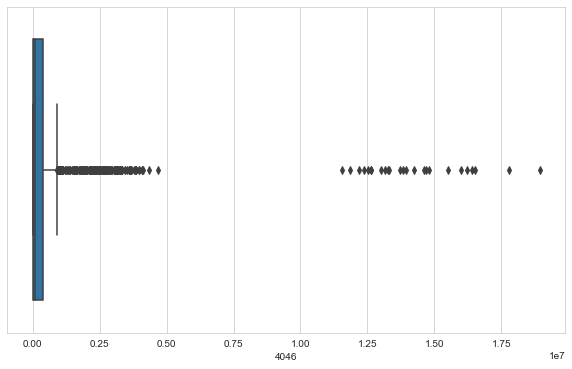

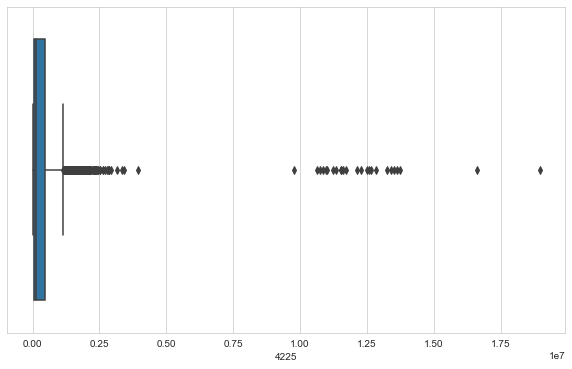

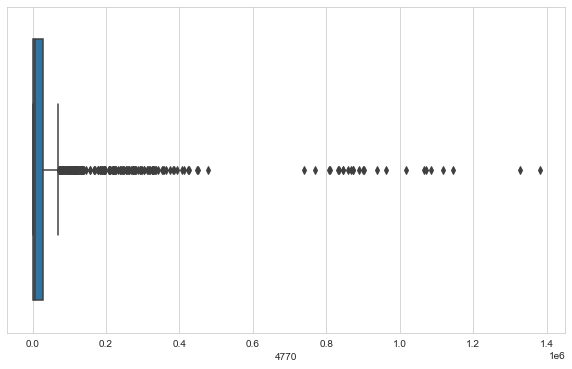

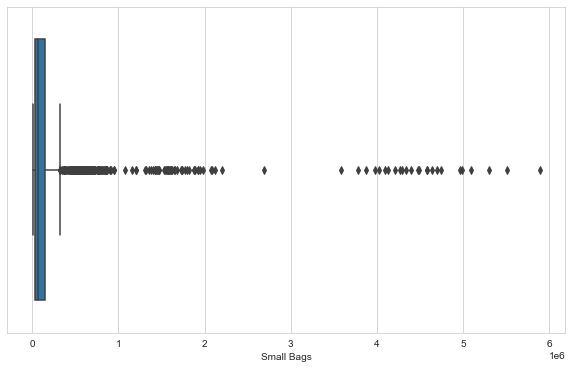

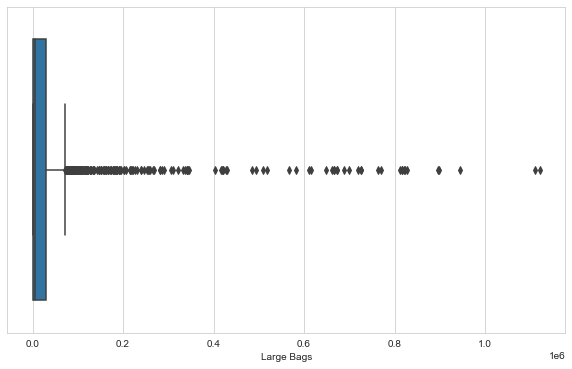

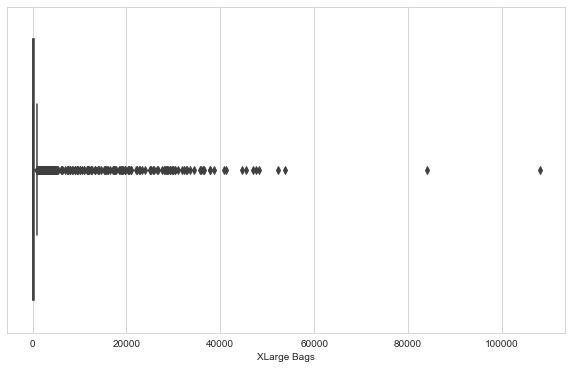

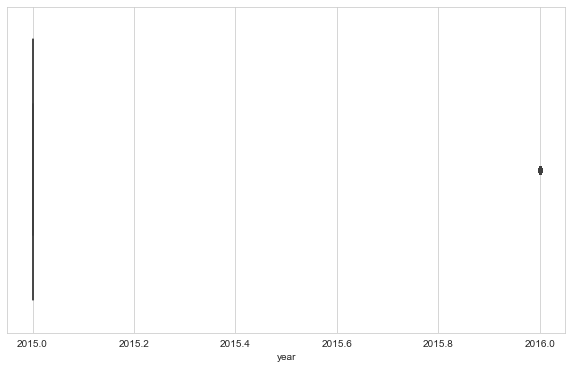

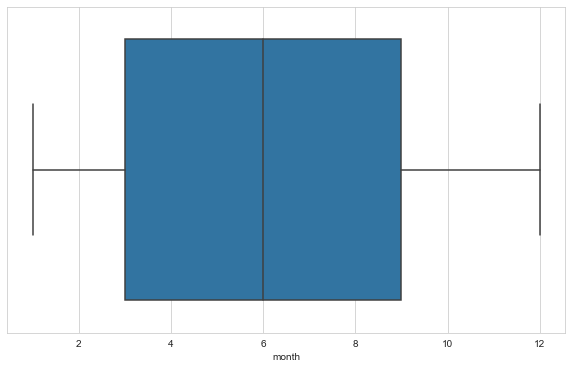

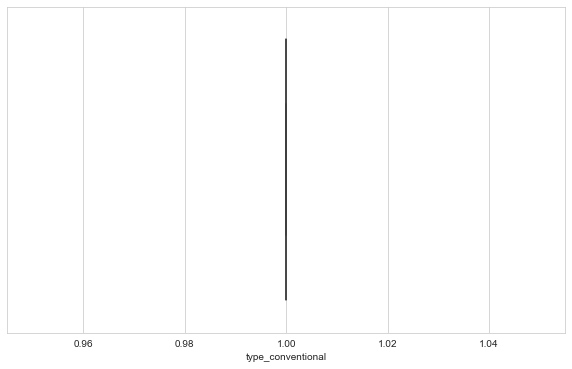

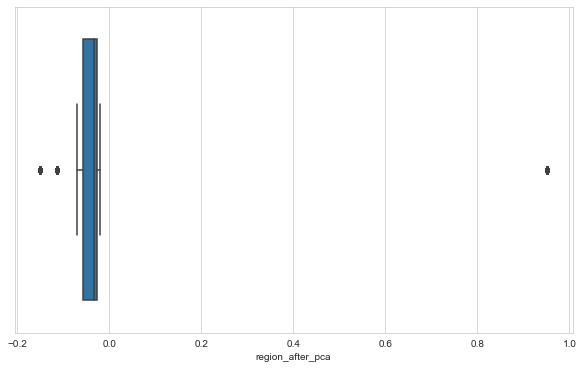

In [245]:
col_name = list(avocado_data_analysis.columns)[1:]
for col in col_name:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    sns.boxplot(x = col, data=avocado_data_analysis)
    #ax.set(title="Diabetes Coutcome vs {0}".format(col))

#### from the boxplot, it is quite evident that we have so many outliers. Lets check their count and %

In [246]:
dataframe_name = avocado_data_analysis
outlier_columns = list(avocado_data_analysis.columns)[1:7] # List of all the columns except "AveragePrice" 

def outlier_finding():
    for col in outlier_columns:
        IQR = round(dataframe_name[col].quantile(0.75) - dataframe_name[col].quantile(0.25),2)
        print('For column "',col,'":')
        print('IQR value of "',col,'" is = ',IQR)
   
    # 1.5 outlier values 
        lower_fence = round(dataframe_name[col].quantile(0.25) - (IQR*1.5),2)
        upper_fence = round(dataframe_name[col].quantile(0.75) + (IQR*1.5),2)
        print(f'for normal cases, lower fence = {lower_fence} and upper_fence = {upper_fence}')   
    # outlier count
        outlier_count = dataframe_name[(dataframe_name[col] < lower_fence) | (dataframe_name[col] > upper_fence)].shape[0]
        print(f'\toutlier count within normal range for column "{col}" is {outlier_count} and its % = {round(outlier_count / dataframe_name.shape[0]*100, 2)}%')
        
    # for extreme values
        lower_fence_extreme = round(dataframe_name[col].quantile(0.25) - (IQR*3),2)
        upper_fence_extreme = round(dataframe_name[col].quantile(0.75) + (IQR*3),2)
        print(f'for extreme cases, lower fence = {lower_fence_extreme} and upper_fence = {upper_fence_extreme}')       
    # outlier count
        outlier_count_extreme = dataframe_name[(dataframe_name[col] < lower_fence_extreme) | 
                                      (dataframe_name[col] > upper_fence_extreme)].shape[0]
        print(f'\toutlier count within extreme range for column "{col}" is {outlier_count_extreme} and its % = {round(outlier_count_extreme / dataframe_name.shape[0]*100, 2)}%\n')

outlier_finding()

For column " 4046 ":
IQR value of " 4046 " is =  357178.14
for normal cases, lower fence = -515366.87 and upper_fence = 913345.69
	outlier count within normal range for column "4046" is 210 and its % = 13.84%
for extreme cases, lower fence = -1051134.08 and upper_fence = 1449112.9
	outlier count within extreme range for column "4046" is 181 and its % = 11.93%

For column " 4225 ":
IQR value of " 4225 " is =  443674.28
for normal cases, lower fence = -624035.36 and upper_fence = 1150661.76
	outlier count within normal range for column "4225" is 226 and its % = 14.9%
for extreme cases, lower fence = -1289546.78 and upper_fence = 1816173.18
	outlier count within extreme range for column "4225" is 133 and its % = 8.77%

For column " 4770 ":
IQR value of " 4770 " is =  28256.05
for normal cases, lower fence = -41472.82 and upper_fence = 71551.38
	outlier count within normal range for column "4770" is 244 and its % = 16.08%
for extreme cases, lower fence = -83856.9 and upper_fence = 113935.4

In [247]:
def outlier_removal():
    for col in outlier_columns:
        IQR = round(dataframe_name[col].quantile(0.75) - dataframe_name[col].quantile(0.25),2)
   
        # 1.5 outlier values 
        lower_limit = round(dataframe_name[col].quantile(0.25) - (IQR*1.5),2)
        upper_limit = round(dataframe_name[col].quantile(0.75) + (IQR*1.5),2)

        dataframe_name[col] = np.where(
            (dataframe_name[col] < lower_limit) | (dataframe_name[col] > upper_limit),
            round(dataframe_name[col].mean(),2),
            dataframe_name[col])
        
outlier_removal()

In [248]:
dataframe_name = avocado_data_analysis
outlier_columns = list(avocado_data_analysis.columns)[1:7] # List of all the columns except "AveragePrice" 

def outlier_finding():
    for col in outlier_columns:
        IQR = round(dataframe_name[col].quantile(0.75) - dataframe_name[col].quantile(0.25),2)
        print('For column "',col,'":')
        print('IQR value of "',col,'" is = ',IQR)
   
    # 1.5 outlier values 
        lower_fence = round(dataframe_name[col].quantile(0.25) - (IQR*1.5),2)
        upper_fence = round(dataframe_name[col].quantile(0.75) + (IQR*1.5),2)
        print(f'for normal cases, lower fence = {lower_fence} and upper_fence = {upper_fence}')   
    # outlier count
        outlier_count = dataframe_name[(dataframe_name[col] < lower_fence) | (dataframe_name[col] > upper_fence)].shape[0]
        print(f'\toutlier count within normal range for column "{col}" is {outlier_count} and its % = {round(outlier_count / dataframe_name.shape[0]*100, 2)}%')
        
    # for extreme values
        lower_fence_extreme = round(dataframe_name[col].quantile(0.25) - (IQR*3),2)
        upper_fence_extreme = round(dataframe_name[col].quantile(0.75) + (IQR*3),2)
        print(f'for extreme cases, lower fence = {lower_fence_extreme} and upper_fence = {upper_fence_extreme}')       
    # outlier count
        outlier_count_extreme = dataframe_name[(dataframe_name[col] < lower_fence_extreme) | 
                                      (dataframe_name[col] > upper_fence_extreme)].shape[0]
        print(f'\toutlier count within extreme range for column "{col}" is {outlier_count_extreme} and its % = {round(outlier_count_extreme / dataframe_name.shape[0]*100, 2)}%\n')

outlier_finding()

For column " 4046 ":
IQR value of " 4046 " is =  357178.14
for normal cases, lower fence = -515366.87 and upper_fence = 913345.69
	outlier count within normal range for column "4046" is 0 and its % = 0.0%
for extreme cases, lower fence = -1051134.08 and upper_fence = 1449112.9
	outlier count within extreme range for column "4046" is 0 and its % = 0.0%

For column " 4225 ":
IQR value of " 4225 " is =  443674.28
for normal cases, lower fence = -624035.36 and upper_fence = 1150661.76
	outlier count within normal range for column "4225" is 0 and its % = 0.0%
for extreme cases, lower fence = -1289546.78 and upper_fence = 1816173.18
	outlier count within extreme range for column "4225" is 0 and its % = 0.0%

For column " 4770 ":
IQR value of " 4770 " is =  28256.05
for normal cases, lower fence = -41472.82 and upper_fence = 71551.38
	outlier count within normal range for column "4770" is 0 and its % = 0.0%
for extreme cases, lower fence = -83856.9 and upper_fence = 113935.45
	outlier count w

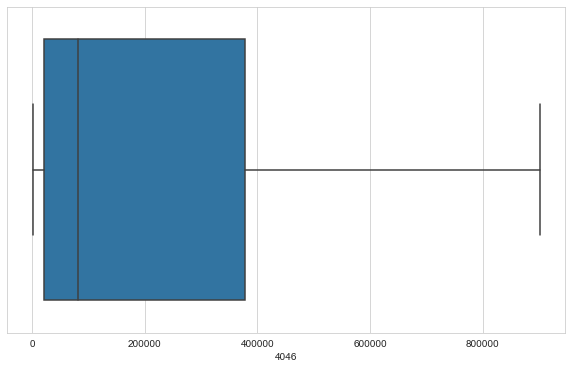

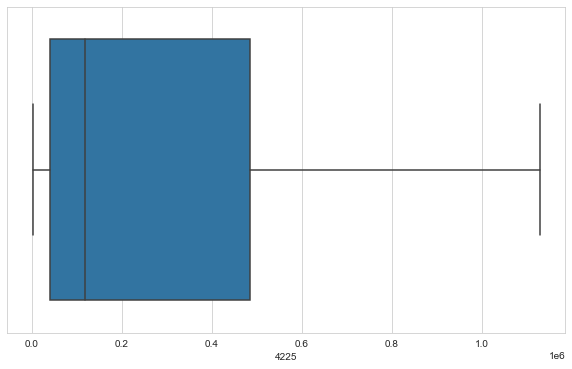

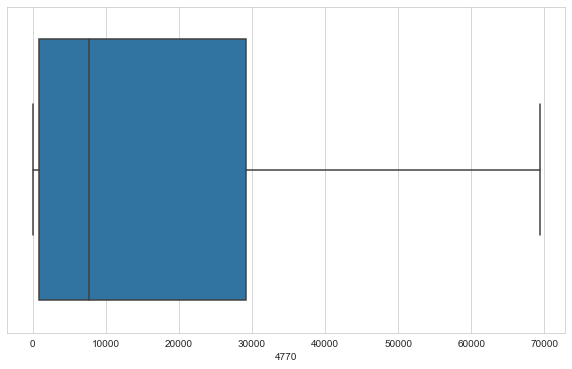

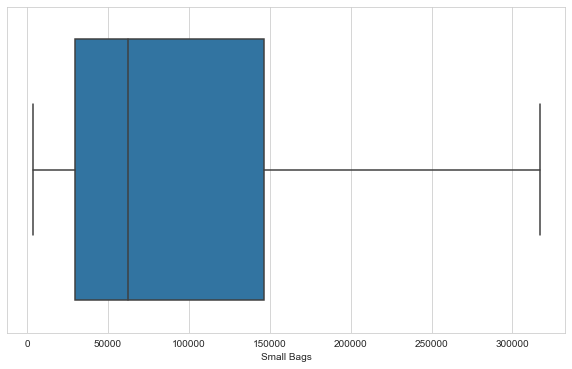

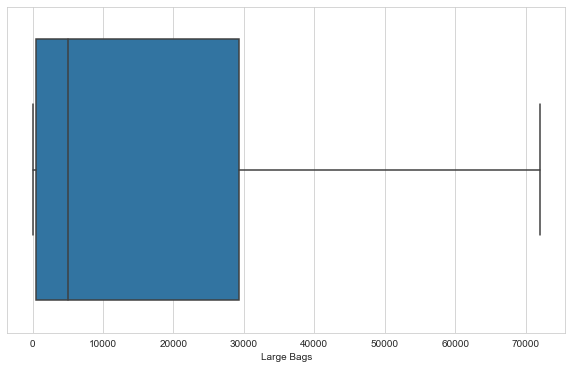

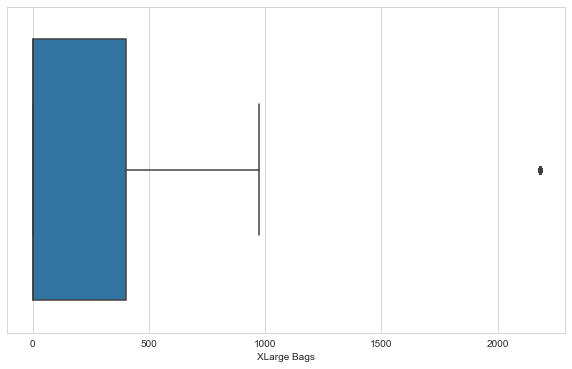

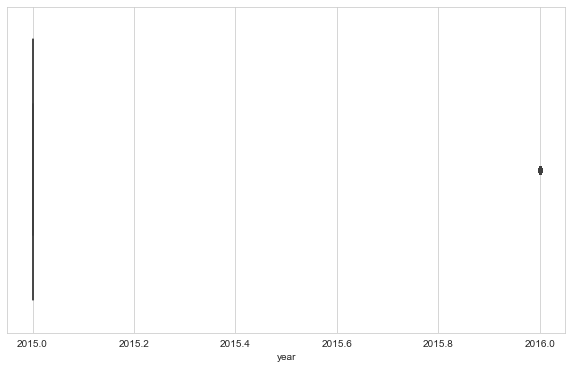

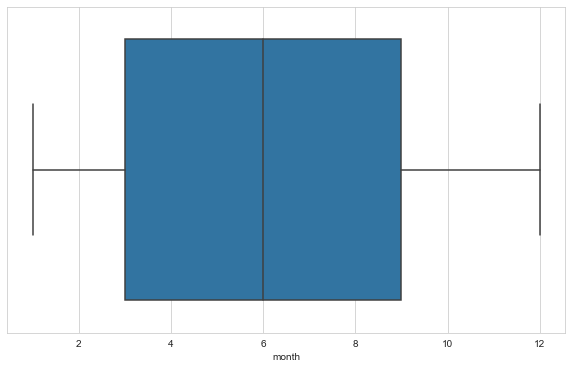

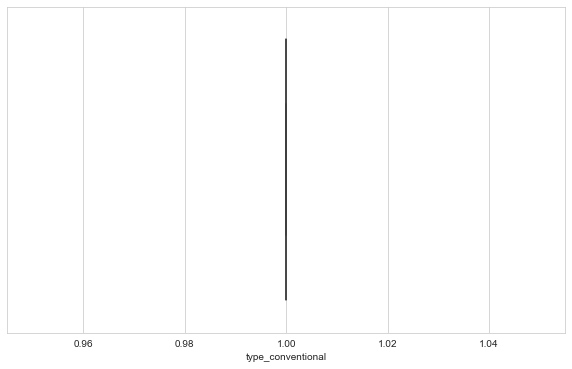

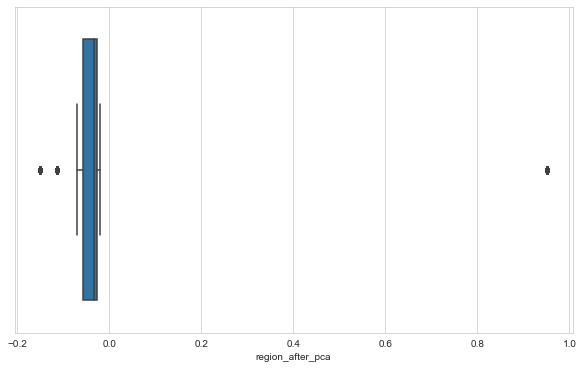

In [249]:
col_name = list(avocado_data_analysis.columns)[1:]
for col in col_name:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    sns.boxplot(x = col, data=avocado_data_analysis)
    #ax.set(title="Diabetes Coutcome vs {0}".format(col))

#### After removing the outliers, we will proceed for model building

In [299]:
# Seperating the independent and dependent variables

y = avocado_data_analysis['AveragePrice']
X = avocado_data_analysis.iloc[:,1:]
(print(X.shape, y.shape) )

(1517, 10) (1517,)


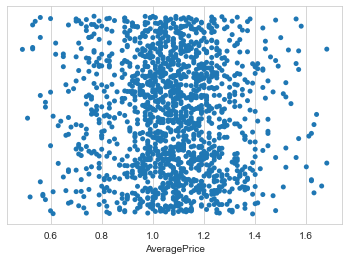

In [302]:
sns.stripplot(y)

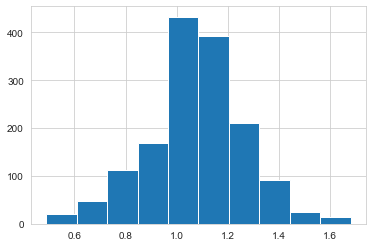

In [306]:
plt.hist(y)
plt.show()

In [307]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(1016, 10) (501, 10)
(1016,) (501,)


In [308]:
X_train.describe()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,month,type_conventional,region_after_pca
count,1016.000000,1.016000e+03,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.00000,1016.0,1016.000000
mean,211396.002953,2.522246e+05,16531.656211,94920.891929,14886.349222,475.869528,2015.167323,6.37500,1.0,-0.002981
std,254449.859210,2.571344e+05,19210.155611,84980.119151,18405.326659,847.686866,0.373448,3.50146,0.0,0.218266
min,509.940000,1.783770e+03,0.000000,3311.770000,0.000000,0.000000,2015.000000,1.00000,1.0,-0.150491
25%,17473.897500,4.198291e+04,907.082500,29307.415000,472.980000,0.000000,2015.000000,3.00000,1.0,-0.056093
50%,76183.905000,1.189817e+05,7196.475000,62961.625000,4689.380000,0.000000,2015.000000,6.00000,1.0,-0.032510
75%,368870.350000,4.881611e+05,25844.575000,142708.230000,28512.892500,393.280000,2015.000000,10.00000,1.0,-0.025944
max,901701.940000,1.129206e+06,69371.340000,316975.340000,71988.590000,2181.770000,2016.000000,12.00000,1.0,0.951756


#### The standard deviation and the range of data is huge. We must apply some standard scaling technique

In [309]:
# Import Standard scaler

from sklearn.preprocessing import MinMaxScaler # converting the data into a standard Normal distribution
std_scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(std_scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(std_scaler.fit_transform(X_test), columns = X_test.columns)

X_train_scaled.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,month,type_conventional,region_after_pca
0,0.065161,0.510051,0.228930,0.581506,0.042148,1.000000,1.0,0.272727,0.0,0.000000
1,0.410611,0.041673,0.001317,0.147915,0.573512,0.154691,0.0,0.363636,0.0,0.113816
2,0.196759,0.065365,0.726604,0.156866,0.014817,1.000000,0.0,0.636364,0.0,0.101904
3,0.013970,0.303393,0.158072,0.428781,0.000154,1.000000,1.0,0.545455,0.0,0.033263
4,0.065847,0.462779,0.220486,0.562698,0.043631,0.000000,1.0,0.181818,0.0,0.000000


In [310]:
X_test_scaled.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,month,type_conventional,region_after_pca
0,0.002055,0.278871,0.216743,0.356626,0.000000,0.000000,0.0,0.454545,0.0,0.107810
1,0.000878,0.041045,0.013915,0.044672,0.106230,0.071809,0.0,1.000000,0.0,0.111647
2,0.732783,0.570165,0.739286,0.835326,0.682271,1.000000,1.0,0.272727,0.0,1.000000
3,0.732783,0.570165,0.739286,0.835326,0.612792,1.000000,1.0,0.636364,0.0,1.000000
4,0.002668,0.024609,0.000693,0.016209,0.007610,0.000000,0.0,0.272727,0.0,0.119062


In [314]:
# creating a linear regression model

from sklearn.linear_model import LinearRegression, Ridge, Lasso

# creating a linear regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

model_linear_scaled = LinearRegression()
model_linear_scaled.fit(X_train_scaled, y_train)


# regularized model Ridge
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

model_ridge_scaled = Ridge()
model_ridge_scaled.fit(X_train_scaled, y_train)


# regularized model Lasso
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

model_lasso_scaled = Lasso()
model_lasso.fit(X_train_scaled, y_train)


print('Score for Linear Regression model')
print("Training score = ", model_linear.score(X_train, y_train))
print("Test score = ", model_linear.score(X_test, y_test))
print('Score for Linear Regression scaled model')
print("Training score = ", model_linear.score(X_train_scaled, y_train))
print("Test score = ", model_linear.score(X_test_scaled, y_test))

print('\nScore for Ridge Regression model')
print("Training Score = ",model_ridge.score(X_train, y_train))
print("Test score = ",model_ridge.score(X_test, y_test))
print('\nScore for Ridge Regression scaled model')
print("Training Score = ",model_ridge.score(X_train_scaled, y_train))
print("Test score = ",model_ridge.score(X_test_scaled, y_test))

print('\nScore for Lasso Regression model')
print("Training Score = ",model_lasso.score(X_train, y_train))
print("Test Score = ",model_lasso.score(X_test, y_test))
print('\nScore for Lasso Regression scaled model')
print("Training Score = ",model_lasso.score(X_train_scaled, y_train))
print("Test Score = ",model_lasso.score(X_test_scaled, y_test))

Score for Linear Regression model
Training score =  0.4378979079114024
Test score =  0.4280467709042225
Score for Linear Regression scaled model
Training score =  -22462.07064471756
Test score =  -23401.820358667224

Score for Ridge Regression model
Training Score =  0.437874737492147
Test score =  0.4281926264787522

Score for Ridge Regression scaled model
Training Score =  -23973.18891185862
Test score =  -24976.482346862493

Score for Lasso Regression model
Training Score =  0.0
Test Score =  -0.00027707209129324006

Score for Lasso Regression scaled model
Training Score =  0.0
Test Score =  -0.00027707209129324006


In [315]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'alpha': [1e-3, 1e-2, 1e-1, 1,2,5,10,100],
}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg.fit(X_train,y_train)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model = Ridge_reg.best_estimator_
best_model.fit(X,y)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [316]:
print(best_model.score(X_train,y_train))
best_model.score(X_test,y_test)

0.4371427784799197


0.43161573612382875

In [318]:
from sklearn.externals import joblib  

# Save the model
joblib.dump(best_model, 'Avocado_price_prediction_model.pkl')


['Avocado_price_prediction_model.pkl']